# Поиск объектов по цвету
На изображение планшета с лунками зафиксированы результаты химической реакции.

Необходимо выделить ячейки заданного цвета.

In [228]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski                # Image Processing for Python

Посмотрим, что на изображении wellplate-1.jpg

Необходимо учитывать, что OpenCV при чтении изображения из файла получается представление в BGR и что-бы правильно тображалось стандартными средствами, следует преобразовать в RGB.

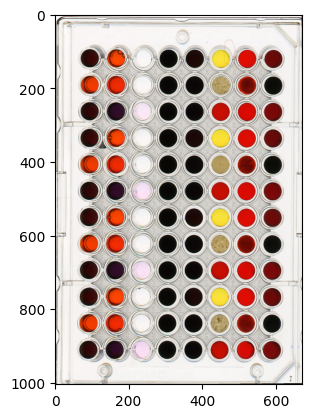

In [229]:
# Load the image
img_bgr = cv.imread("drive/MyDrive/cv_data/wellplate-1.jpg")
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)

Построим гистограммы для каждого канала (RGB).

Text(0, 0.5, 'pixel count')

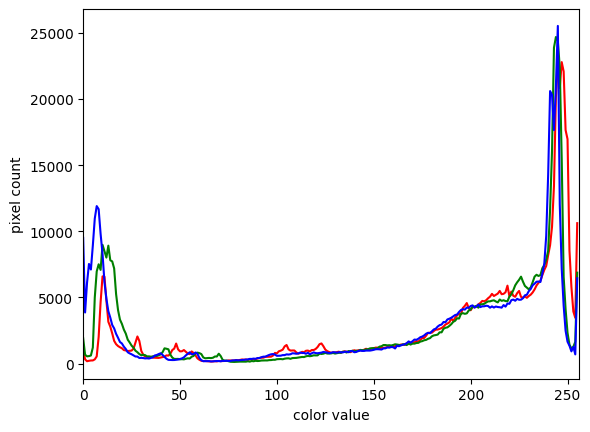

In [230]:
# list to select colors of each channel line
colors = ("red", "green", "blue")
# create the histogram plot, with three lines, one for each color
plt.figure()
plt.xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        img_rgb[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(histogram, color=color)

plt.xlabel("color value")
plt.ylabel("pixel count")

По гистограмме затруднительно сказать как задаются цвета, которые могут нас интересовать. Предположим, что мы хотим в дальнейшем выделить только жёлтые или только красные ячейки.

Поэтому поинтересуемся как описывается свет пикселей в какой-то одной лунке. Для этого построим маску изображения с одной лункой и построим гистограмму для области с ячейкой.

Text(0, 0.5, 'pixel count')

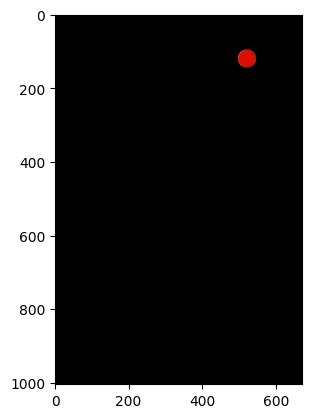

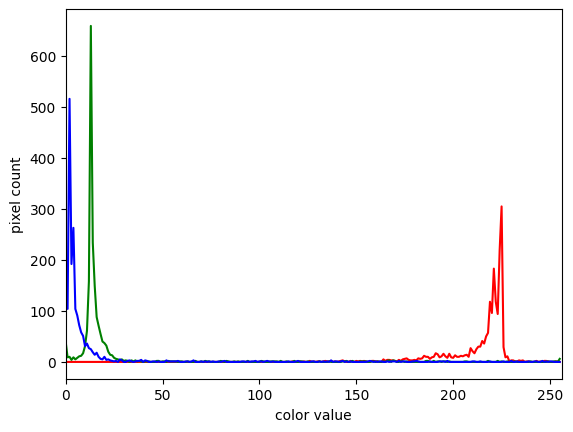

In [231]:
# create a circular mask to select the 7th well in the first row
wellplate = np.copy(img_rgb);
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
#circle = ski.draw.disk(center=(240, 1053), radius=49, shape=wellplate.shape[0:2])
circle = ski.draw.disk(center=(121, 520), radius=25, shape=wellplate.shape[0:2])
mask[circle] = 1

# make a copy of the image (masked_image) and indexing to apply the mask to it
masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0

# create a new figure and display masked_img, to verify the validity of your mask
fig, ax = plt.subplots()
plt.imshow(masked_img)

# list to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for each color
plt.figure()
plt.xlim([0, 256])
for (channel_id, color) in enumerate(colors):
    # use your circular mask to apply the histogram
    # operation to the 7th well of the first row
    histogram, bin_edges = np.histogram(
        wellplate[:, :, channel_id][mask], bins=256, range=(0, 256)
    )
    plt.plot(histogram, color=color)

plt.xlabel("color value")
plt.ylabel("pixel count")

А что если преобразовать изображение в HSV?
Hue — цветовой тон, (например, красный, зелёный или сине-голубой). 
Saturation — насыщенность. Чем больше этот параметр, тем «чище» цвет, поэтому этот параметр иногда называют чистотой цвета, a чем ближе этот параметр к нулю, тем ближе цвет к нейтральному серому.
Value (значение цвета) или Brightness — яркость.
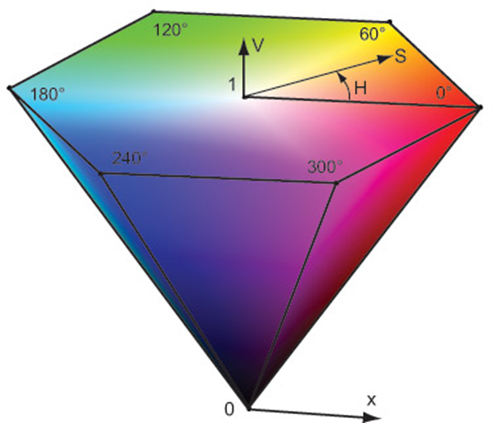

Text(0.5, 1.0, 'RGB')

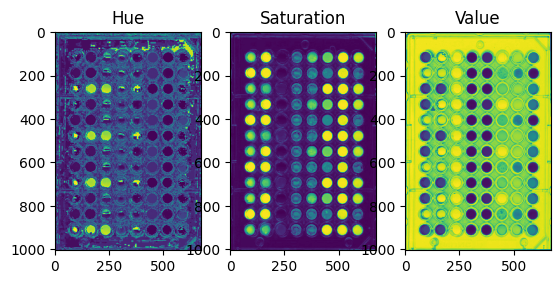

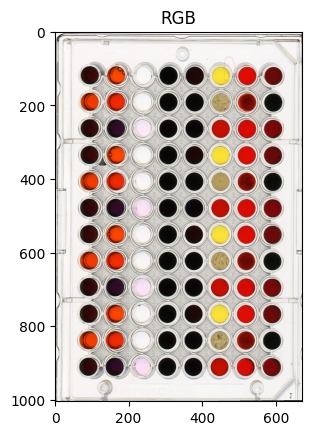

In [232]:
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_hsv[:,:,0])
ax1.set_title("Hue")
ax2.imshow(img_hsv[:,:,1])
ax2.set_title("Saturation")
ax3.imshow(img_hsv[:,:,2])
ax3.set_title("Value")

plt.figure()
plt.imshow(img_rgb)
plt.title("RGB")

Построим гистограмму для канала Hue.

[ 20   6  13  30  24  11 165   8  16  36]


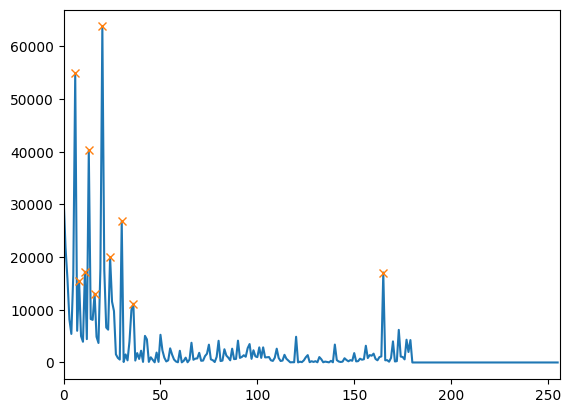

In [233]:
plt.figure()
plt.xlim([0, 256])
histogram, bin_edges = np.histogram(
  img_hsv[:, :, 0], bins=256, range=(0, 256)
)
plt.plot(histogram)

from scipy.signal import argrelextrema

# Detect local maxima
from scipy.signal import find_peaks
peaks, _ = find_peaks(histogram)
_, sorted_peaks = zip(*sorted(zip(histogram[peaks], peaks), reverse=True))
sorted_peaks = np.asarray(sorted_peaks[:10])
print(sorted_peaks)
#print(peaks)
plt.plot(sorted_peaks,histogram[sorted_peaks],"x")


Выделим на изображении участки с заданным тоном.

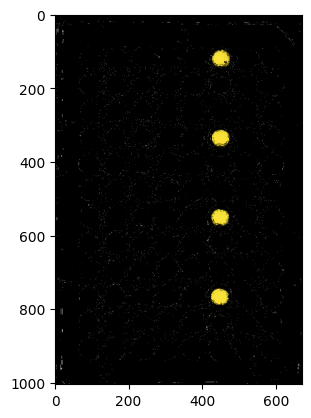

In [234]:
wellplate = np.copy(img_rgb);
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
x = np.where( (img_hsv[:,:,0]>25) & (img_hsv[:,:,0]<28) ) # yellow dots
# x = np.where( (img_hsv[:,:,0]>0) & (img_hsv[:,:,0]<3) ) #  red dots
# x = np.where( (img_hsv[:,:,0]>6) & (img_hsv[:,:,0]<10) ) #  light red dots
mask[x] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
plt.imshow(masked_img)

In [235]:
def plot_one_hue(c):
  wellplate = np.copy(img_rgb);
  mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
  x = np.where( img_hsv[:,:,0]==c)
  mask[x] = 1
  masked_img = wellplate[:]
  masked_img[np.logical_not(mask)] = 0
  plt.figure()
  plt.imshow(masked_img)
  plt.title("c="+str(c))

In [236]:
#for c in sorted_peaks:
#  plot_one_hue(c)